# Data Extraction & Transformation


In [1]:
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
base_url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data/'
comp_url = base_url + 'matches/{}/{}.json' 
match_url = base_url + 'events/{}.json'

In [3]:
def parse_data(competion_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]
    
    all_events = []
    for match_id in tqdm(match_ids):
        
        events = requests.get(url=match_url.format(match_id)).json()
        
        shots = [x for x in events if x['type']['name'] == 'Shot']
        for s in shots:
            attributes = {
                'match_id': match_id, 
                'team': s['possession_team']['name'],
                'player': s['player']['name'], 
                'x' : s['location'][0],
                'y' : s['location'][1],
                'outcome': s['shot']['outcome']['name'],
            }
            all_events.append(attributes)
    return pd.DataFrame(all_events)

In [4]:
competition_id = 43
season_id = 3

In [5]:
d = {'name':'yuma', 'man':{'name': 'sam', 'age': 1, 'sex':'man'}}
print(d['man']['name'])
print(d['man']['sex'])

sam
man


In [6]:
d = {'name':['y', 'u', 'm', 'a']}
d['name'][0]

'y'

In [7]:
_class = [{'name':'y', 'age': 21}, {'kakikukeko':'u', 'sa': 22 }]
pd.DataFrame(_class)

,name,age,kakikukeko,sa
0,y,21.0,NaN,NaN
1,NaN,NaN,u,22.0


In [8]:
_list = [[1,2,3,4], [5,6,7,8]]
pd.DataFrame(_list)

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


# Liner Regression

In [9]:
base_url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data/'
comp_url = base_url + 'matches/{}/{}.json'
match_url = base_url + 'events/{}.json'

In [10]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]
    
    all_events = []
    for match_id in tqdm(match_ids):
        
        events = requests.get(url=match_url.format(match_id)).json()
        passes = [x for x in events if x['type']['name'] == "Pass"]
        
        for a in passes:
            attributes = {
                "player_id": a['player']['id'],
                "outcome": 0 if 'outcome' in a['pass'].keys() else 1,
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

In [11]:
competition_id = 43
season_id = 3
df = parse_data(competition_id, season_id)

100%|██████████| 64/64 [01:05<00:00,  1.02s/it]


In [12]:
df.head()

,player_id,outcome
0,3043,1
1,3027,0
2,5468,0
3,5527,1
4,3959,0


In [13]:
total_passes = df.groupby('player_id')['outcome'].sum()
percentage = df.groupby('player_id')['outcome'].mean()

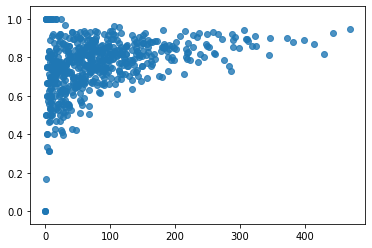

In [14]:
plt.scatter(total_passes, percentage, alpha=0.8)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
fit = model.fit([[x] for x in total_passes], percentage)
print("Coefficients: {}".format(fit.coef_))
print("Intercept: {}".format(fit.intercept_))

Coefficients: [0.00063207]
Intercept: 0.7094185597471281


In [17]:
xfit = [0, 500] # This is the x-axis range of the chart
yfit = model.predict([[x] for x in xfit])

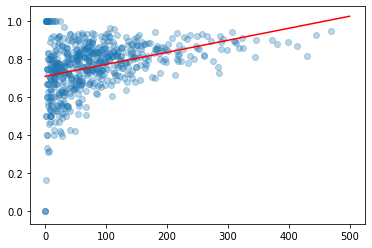

In [18]:
plt.scatter(total_passes, percentage, alpha=0.3)
plt.plot(xfit, yfit, 'r')
plt.show()

In [67]:
d = {'man':{'name':'yuma'}}
if 'name' in d['man'].keys():
    print('ok')
else:
    print('not')

ok


In [93]:
df = pd.DataFrame({
    'city': ['osaka', 'osaka', 'osaka', 'osaka', 'tokyo', 'tokyo', 'tokyo'],
    'food': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
df

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,orange,200,2
2,osaka,banana,250,3
3,osaka,banana,300,4
4,tokyo,apple,150,5
5,tokyo,apple,200,6
6,tokyo,banana,400,7


In [107]:
a = df.groupby('city')['price'].sum()
a

city
osaka    850
tokyo    750
Name: price, dtype: int64

In [109]:
a = df.groupby('city')['quantity'].mean()
a

city
osaka    2.5
tokyo    6.0
Name: quantity, dtype: float64

In [96]:
df.groupby(['city', 'food']).mean()

price  quantity
city  food                   
osaka apple   100.0       1.0
      banana  275.0       3.5
      orange  200.0       2.0
tokyo apple   175.0       5.5
      banana  400.0       7.0

In [103]:
df.groupby('city').apply(lambda d: print(d))

    city    food  price  quantity
0  osaka   apple    100         1
1  osaka  orange    200         2
2  osaka  banana    250         3
3  osaka  banana    300         4
    city    food  price  quantity
4  tokyo   apple    150         5
5  tokyo   apple    200         6
6  tokyo  banana    400         7


""


In [85]:
a.groupby('name')[0].sum()

name
ma    3
u     2
y     1
Name: 0, dtype: int64